In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats

## Exponential Distribution ##

A random variable $T$ has the *exponential distribution with parameter $\lambda$* if the density of $T$ is given by

$$
f_T(t) ~ = \lambda e^{-\lambda t}, ~~~ t \ge 0
$$

The graph below shows the density $f_T$ for $\lambda = 5$.

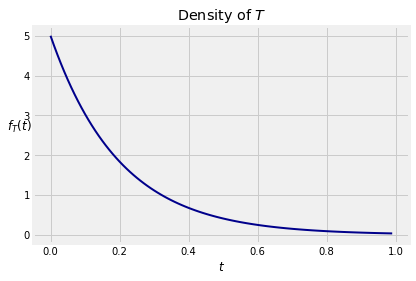

In [2]:
# NO CODE
lam = 5
t = np.arange(0, 1, 0.01)
y = stats.expon.pdf(t, scale=1/5)

plt.plot(t, y, color='darkblue', lw=2)
plt.xlabel('$t$')
plt.ylabel('$f_T(t)$', rotation=False)
plt.title('Density of $T$');

### CDF and Survival Function ###
The exponential distribution is often used as a model for random lifetimes, in settings that we will study in greater detail below. For now, just think of $T$ as the lifetime of an object like a lightbulb, and note that the cdf at time $t$ can be thought of as the chance that the object dies before time $t$:

$$
P(T \le t) ~ = ~ F_T(t) ~ = ~ 1 - e^{-\lambda t}
$$

The complementary event is that the object survives past time $t$, and therefore its probability defines the *survival function* $S_T$:

$$
S_T(t) ~ = ~ P(T > t) ~ = ~ 1 - F_T(t) ~ = ~ e^{-\lambda t}
$$

### Mean and SD ###
To find $E(T)$, you have two options:
$$
E(T) ~ = ~ \int_0^{\infty} t\lambda e^{-\lambda t} dt ~ = ~ \frac{1}{\lambda}
$$

either by integration by parts or by recognizing the indefinite integral of $\lambda te^{-\lambda t}$ . Since $T$ is a non-negative variable, an easier way is to use the *tail integral*, analogous to the tail sum formula for the expectation of a non-negative integer valued random variable.

$$
E(T) ~ = ~ \int_0^\infty S(t)dt ~ = ~ \int_0^\infty e^{-\lambda t}dt ~ = ~ \frac{1}{\lambda}
$$

To find $E(T^2)$, you can use integration by parts, or you can accept for now that $E(T^2) = 2/\lambda^2$ and therefore 

$$
Var(T) ~ = ~ \frac{1}{\lambda^2} ~~~~ \mbox{and } ~~~~ SD(T) = \frac{1}{\lambda}
$$

Later in the course we will see how to find $E(T^2)$ without integration.

The graph below shows the density $f_T$ with the labeled points on the horizontal axis corresponding to standard units of -1, 0, 1, 2, and 3. The random variable $T$ can't be negative, and the density doesn't go further than 1 SD below the mean. The spread comes from the long right hand tail.

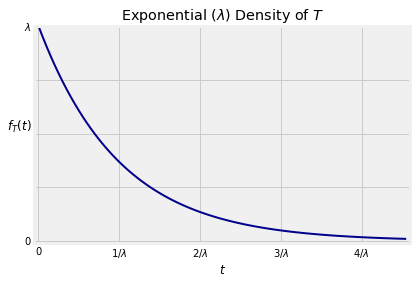

In [3]:
# NO CODE
lam = 5
sd = 1/lam
t = np.arange(0, 4.6*sd, 0.01)
y = stats.expon.pdf(t, scale=sd)

plt.plot(t, y, color='darkblue', lw=2)
plt.xticks(np.arange(0, 4*sd+0.1, sd),
          ['0', '$1/\lambda$', '$2/\lambda$', '$3/\lambda$', '$4/\lambda$'])
plt.yticks([0, lam/4, lam/2, 3*lam/4, lam], 
           ['0','','','', '$\lambda$'])
plt.xlim(-0.01, 4.6*sd)
plt.ylim(-0.05, lam)
plt.xlabel('$t$')
plt.ylabel('$f_T(t)$', rotation=0)
plt.title('Exponential $(\lambda)$ Density of $T$');

### Median ###
Here are graphs of the cdf and the survival function.

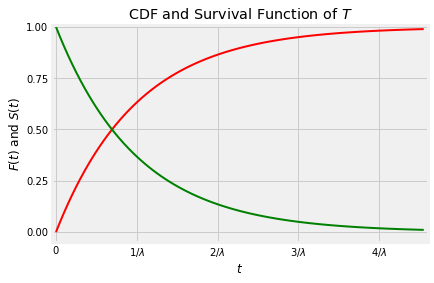

In [4]:
# NO CODE
plt.plot(t, stats.expon.cdf(t, scale=sd), color='r', lw=2)
t = np.arange(0, 4.6*sd, 0.01)
plt.plot(t, 1-stats.expon.cdf(t, scale=sd), color='g', lw=2)
plt.xticks(np.arange(0, 4*sd+0.1, sd),
          ['0', '$1/\lambda$', '$2/\lambda$', '$3/\lambda$', '$4/\lambda$'])
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlim(-0.01, 4.6*sd)
plt.ylim(-0.05, 1.01)
plt.xlabel('$t$')
plt.ylabel('$F(t)$ and $S(t)$')
plt.title('CDF and Survival Function of $T$');

Notice that the two curves intersect at the vertical level 0.5. If $t_{0.5}$ is the value of $t$ at which the curves intersect, then

$$
S_T(t_{0.5}) = 1 - F_T(t_{0.5}) ~~~~ \text{and} ~~~~ S_T(t_{0.5}) = F_T(t_{0.5})
$$

and therefore
$$
P(T > t_{0.5}) = S_T(t_{0.5}) = 0.5 = F_T(t_{0.5}) = P(T \le t_{0.5})
$$

The point $t_{0.5}$ is called the *median* of the distribution. We can find $t_{0.5}$ in terms of $\lambda$ by using the formula for the survival function.

$$
e^{-\lambda t_{0.5}} = 0.5 ~ \iff ~ -\lambda t_{0.5} = \log(0.5) ~ \iff ~ \lambda t_{0.5} =  \log(2) ~ \iff ~ t_{0.5} = \frac{\log(2)}{\lambda} = \log(2)E(T)
$$

Because $\log(2) < 1$, the median lifetime $t_{0.5}$ is less than the mean lifetime $E(T) = 1/\lambda$ as you can see on the graph. This is consistent with an observation you made in Data 8: if a distribution has a right hand tail, the median is less than the mean.

The exponential distribution is often used to model lifetimes of objects like radioactive atoms that undergo *exponential decay*. The *half life* of a radioactive isotope is defined as the time by which half of the atoms of the isotope will have decayed. That is, the half life is the median of the exponential lifetime of the atom. The parameter $\lambda$ is called the *decay rate* of the atom. By the property of the median $t_{0.5}$ derived above, the relation between $\lambda$ and the half life is

$$
\text{half life} = \frac{\log(2)}{\lambda}
$$

### Memoryless Property ###
Let $s$ and $t$ be positive, and let's find the conditional probability that the object survives a further $s$ units of time given that it has already survived $t$.

$$
P(T > t+s \mid T > t) = \frac{P(T > t+s, T > t)}{P(T > t)} 
= \frac{P(T > t+s)}{P(T > t)} = \frac{e^{-\lambda(t+s)}}{e^{-\lambda t}}
= e^{-\lambda s} = P(T > s)
$$

Notice that $t$ does not appear in the answer. So for example the chance that the object survives an additional year given that it has been alive for 50 years is the same as the chance that is survives a year when it starts out brand new. It *forgets* that it has already lived 50 years. 

This is called the *memoryless property* of the exponential distribution. It can be shown that the exponential and the geometric are the only two distributions that have the memoryless property. As you can see, the graph of the exponential density resembles the geometric probability histogram. It can be thought of as a continuous limit of the geometric, as we will see later.

The memoryless property is an excellent reason *not* to use the exponential distribution to model the lifetimes of people or of anything that ages. For lifetimes of things like lightbulbs or radioactive atoms, the exponential distribution often does fine.

### The Rate ###
If $\lambda$ is large, then $E(T) = 1/\lambda$ is small. If you think of $T$ as a lifetime then large $\lambda$ implies that an early death is expected. To formalize the notion of $\lambda$ as a rate, let $\Delta_t$ be a tiny increment of time and use the memoryless property:

$$
\begin{align*}
P(T \le t + \Delta_t \mid T > t ~ &= ~ 1 - e^{-\lambda \Delta_t} \\
&= ~ \lambda \Delta_t + \frac{\lambda^2\Delta_t^2}{2!} + \cdots \\
&\sim ~ \lambda \Delta_t ~~~~~ \mbox{because } \Delta_t \mbox{ is small}
\end{align*}
$$

The left hand side is the chance that the object dies immediately after time $t$, given that it was still alive at time $t$. We say that $\lambda$ is the *instantaneous death rate*, because

$$
\lambda ~ \sim ~ \frac{P(T \le t+\Delta_t \mid T > t)}{\Delta_t}
$$
